# Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the dataset used for the Anomaly-based Intrusion Detection System. The goal of EDA is to understand the structure of the data, identify patterns, and detect any anomalies or outliers.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

In [3]:
# Load the dataset
data = pd.read_csv('/home/pavani/Documents/VSCODE/packets.csv')  # Update with the actual dataset path

# Display the first few rows of the dataset
data.head()

,time,src,dst,proto,length
0,2025-07-10 13:31:37.769819,192.168.0.157,192.168.0.1,DNS,98
1,2025-07-10 13:31:37.769835,192.168.0.157,192.168.0.1,DNS,98
2,2025-07-10 13:31:37.772704,192.168.0.1,192.168.0.157,DNS,212
3,2025-07-10 13:31:37.773255,192.168.0.1,192.168.0.157,DNS,280
4,2025-07-10 13:31:37.773785,192.168.0.157,140.82.114.21,TCP,74


In [4]:
# Summary statistics
data.describe()

,length
count,182.000000
mean,233.928571
std,376.125979
min,54.000000
25%,66.000000
50%,76.000000
75%,145.000000
max,1506.000000


In [5]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

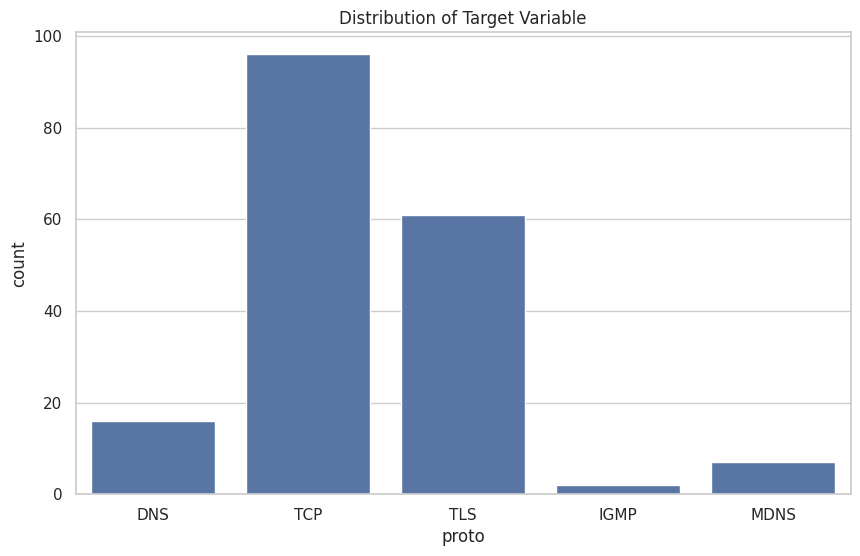

In [8]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='proto', data=data)  # Update with the actual target variable name
plt.title('Distribution of Target Variable')
plt.show()

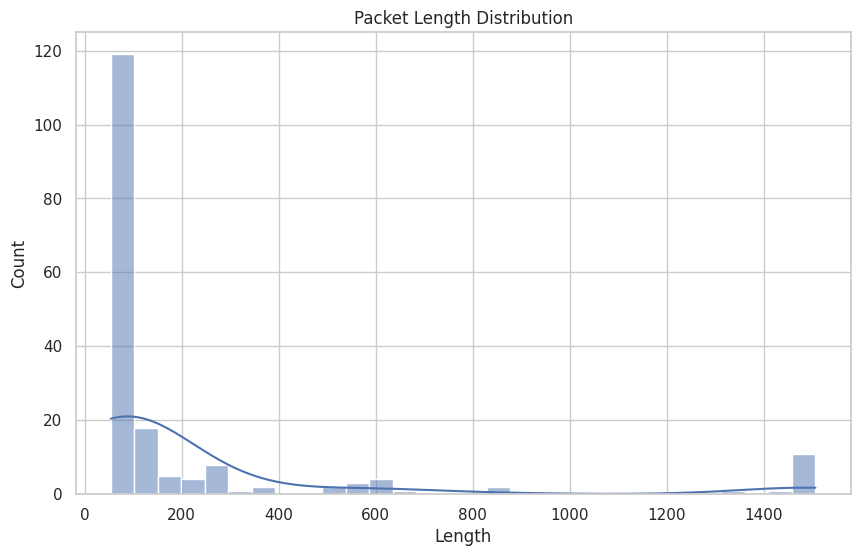

In [10]:
# Distribution of packet lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['length'], bins=30, kde=True)
plt.title('Packet Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()



src
192.168.0.157    87
104.21.96.1      33
140.82.114.21    19
52.168.112.67    10
192.168.0.148     9
Name: count, dtype: int64
dst
192.168.0.157    86
104.21.96.1      37
140.82.114.21    18
52.168.112.67    13
192.168.0.1       8
Name: count, dtype: int64


/tmp/ipykernel_128571/1206363135.py:9: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data.set_index('time')['length'].resample('1S').count().plot(figsize=(12, 6))


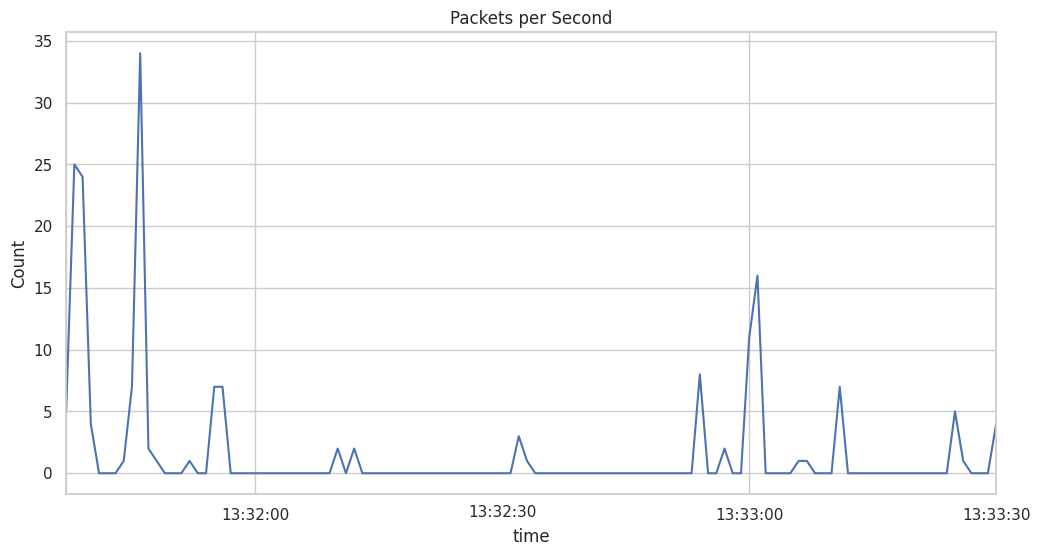

In [12]:
# Top source IPs
print(data['src'].value_counts().head())

# Top destination IPs
print(data['dst'].value_counts().head())

# Traffic over time
data['time'] = pd.to_datetime(data['time'])
data.set_index('time')['length'].resample('1S').count().plot(figsize=(12, 6))
plt.title('Packets per Second')
plt.ylabel('Count')
plt.show()

## Conclusion

In this notebook, we performed exploratory data analysis on the dataset. We visualized the distribution of the target variable, checked for missing values, and examined the correlation between features. This analysis will help inform the feature extraction and model training processes.